In [3]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import iqr # for the outlier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# read the DataFrame

In [4]:
df=pd.read_csv("D:/MLproject/carsData1.csv")

In [5]:
df

,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,وسيلة الدفع,معروضة,...,leather_upholstery,air_cushion,magnesium_rims,sunroof,التكميلي (جسم المركبة),طرف ثالث,المجموع,name_car,model_car,price_car
0,أسود,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,١٨٣٠٠٠,إمكانية التقسيط,للبيع فقط,...,1.0,1.0,0.0,0.0,1340.0,1000.0,2340.0,كيا برايد,موديل سنة 2008,44000.0
1,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1400.0,42000,نقدا فقط,للبيع أو التبديل,...,1.0,1.0,1.0,0.0,1035.0,1016.0,2050.0,هونداي اكسنت,موديل سنة 2013,58000.0
2,أسود,بنزين,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2000.0,85000,إمكانية التقسيط,للبيع فقط,...,1.0,1.0,1.0,1.0,1340.0,1000.0,2340.0,بيجو 508,موديل سنة 2013,40000.0
3,أزرق,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1900.0,30000,إمكانية التقسيط,للبيع أو التبديل,...,1.0,1.0,1.0,0.0,1340.0,1226.0,2565.0,سكودا اوكتافيا,موديل سنة 2010,70000.0
4,رصاصي,بنزين,خصوصي,فلسطينية,عادي,الكتروني,1600.0,NaN,نقدا فقط,للبيع فقط,...,0.0,1.0,1.0,0.0,670.0,500.0,1170.0,سوبارو امبريزا,موديل سنة 1999,33000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,فيات فيات 132,موديل سنة 1973,27000.0
7773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,هونداي سانتافيه,موديل سنة 2016,117000.0
7774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,هونداي اكسنت,موديل سنة 2017,67000.0
7775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,سكودا فابيا,موديل سنة 2015,58000.0


# columns that contain NULL values

In [6]:
df.isna().sum()

لون السيارة                913
نوع الوقود                 913
أصل السيارة                913
رخصة السيارة               913
نوع الجير                  913
الزجاج                     913
قوة الماتور                913
عداد السيارة              2854
وسيلة الدفع                913
معروضة                     913
أصحاب سابقون              2563
عدد الركاب                1690
الدفع                     6346
air_conditioner            913
central_closing            913
alarm_devise               913
CD_recorder                913
leather_upholstery         913
air_cushion                913
magnesium_rims             913
sunroof                    913
التكميلي (جسم المركبة)     924
طرف ثالث                   924
المجموع                    924
name_car                   913
model_car                  913
price_car                  913
dtype: int64

# drop all 913 NULL 

In [7]:
# the NULL in name is same NULL samples in other columns 
df = df.dropna(subset=['name_car'])

In [8]:
df.isna().sum()

لون السيارة                808
نوع الوقود                 808
أصل السيارة                808
رخصة السيارة               808
نوع الجير                  808
الزجاج                     808
قوة الماتور                808
عداد السيارة              2519
وسيلة الدفع                808
معروضة                     808
أصحاب سابقون              2262
عدد الركاب                1482
الدفع                     5606
air_conditioner            808
central_closing            808
alarm_devise               808
CD_recorder                808
leather_upholstery         808
air_cushion                808
magnesium_rims             808
sunroof                    808
التكميلي (جسم المركبة)     815
طرف ثالث                   815
المجموع                    815
name_car                     0
model_car                    0
price_car                    0
dtype: int64

In [9]:
# 808 NULL drop
# after it , we'll have 6864 samples left
column_names = ['لون السيارة', 'نوع الوقود', 'أصل السيارة', 'رخصة السيارة', 'نوع الجير', 'الزجاج', 'قوة الماتور', 'عداد السيارة', 'وسيلة الدفع', 'معروضة', 'leather_upholstery', 'air_cushion', 'magnesium_rims', 'sunroof', 'طرف ثالث', 'التكميلي (جسم المركبة)', 'المجموع']
df = df.dropna(subset=column_names, how='all')

In [10]:
df.isna().sum()

لون السيارة                  0
نوع الوقود                   0
أصل السيارة                  0
رخصة السيارة                 0
نوع الجير                    0
الزجاج                       0
قوة الماتور                  0
عداد السيارة              1711
وسيلة الدفع                  0
معروضة                       0
أصحاب سابقون              1454
عدد الركاب                 674
الدفع                     4798
air_conditioner              0
central_closing              0
alarm_devise                 0
CD_recorder                  0
leather_upholstery           0
air_cushion                  0
magnesium_rims               0
sunroof                      0
التكميلي (جسم المركبة)       7
طرف ثالث                     7
المجموع                      7
name_car                     0
model_car                    0
price_car                    0
dtype: int64

In [11]:
# if name model and price is null , then drop the sample 
# after it , we'll have 6056 samples left
column_names=['model_car', 'name_car',"price_car"]
df = df.dropna(subset=column_names, how='all')

In [12]:
null_percentage = (df['الدفع'].isnull().sum() / len(df)) * 100
print(f"The percentage of null values in الدفع is: {null_percentage:.2f}% and this as a high percentage of missing values")

The percentage of null values in الدفع is: 79.23% and this as a high percentage of missing values


In [13]:
df=df.drop('الدفع',axis=1)

In [14]:
# We will not use the following columns in training the model : 
df=df.drop('لون السيارة',axis=1)
df=df.drop('عداد السيارة',axis=1)
df=df.drop('معروضة',axis=1)
df=df.drop('alarm_devise',axis=1)
df=df.drop('air_cushion',axis=1)
df=df.drop('central_closing',axis=1)
df=df.drop('leather_upholstery',axis=1)
df=df.drop('CD_recorder',axis=1)
df=df.drop('air_conditioner',axis=1)

### remove outliers from Model :

In [15]:
column_name = 'model_car'
# Extract numerical values using regular expressions
df[column_name] = df[column_name].str.extract('(\d+)', expand=False)
# Convert the extracted values to numeric, handling errors and NaN values
df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='integer')
# Convert the numeric values to integers
df[column_name] = df[column_name].astype('Int64')

In [16]:
df['model_car'].describe()

count        6056.0
mean     2008.70426
std        8.607808
min          1968.0
25%          2005.0
50%          2011.0
75%          2015.0
max          2022.0
Name: model_car, dtype: Float64

In [17]:
column_name = 'model_car'
# Convert the 'model_car' column to numeric, handling errors by coercing them to NaN
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Calculate the interquartile range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
iqr_value = Q3 - Q1

# Set a multiplier for the IQR to define the outlier threshold
threshold_multiplier = 1.5

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - threshold_multiplier * iqr_value
upper_bound = Q3 + threshold_multiplier * iqr_value

# Identify outliers using the calculated bounds
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Calculate the percentage of outliers
percentage_outliers = np.sum(outliers) / len(df[column_name]) * 100

print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

Percentage of Outliers: 5.58%


In [18]:
# Identify and remove outliers from the DataFrame
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# the percentage of outliers removed
percentage_outliers_removed = 100 - (len(df) / len(df[column_name]) * 100)
print(f"Percentage of Outliers Removed: {percentage_outliers_removed:.2f}%")

Percentage of Outliers Removed: 0.00%


In [19]:
df['model_car'].describe()
# less std , count
# min now is 1990
# mean now is 2010

count         5718.0
mean     2010.139384
std          6.40483
min           1990.0
25%           2006.0
50%           2011.0
75%           2015.0
max           2022.0
Name: model_car, dtype: Float64

### edit اصحاب سابقون and fill the NULL : 

In [20]:
df['أصحاب سابقون'].unique()

array(['يد اولى', 'يد ثانيه', '3', nan, 'ثالثه', '٤', '6', 'يد ثانية',
       '٢', 'اولى', '0', 'يد 5', '11', '2', 'ثانية', 'يد ثالثة', 'يد 2',
       'يد تانيه', '1', 'يد أولى', 'يد٢', '٣', 'ايد اولى', 'يد 0',
       'يد ثالثه', '---', 'ايد ثانيه', '000', '5', '،',
       'يد أولئ أصحاب سابقون صفر', 'ايد ثانية', '١', 'يد اولي',
       'يد رابعه', 'تانبه', '4', '03', 'يد تانية', '٥', 'أستيراد ألماني',
       'يد اولى الماني', '00', '9', 'يد 8', '7',
       'استيراد مباشر من اوروبا', 'يد عاشرة', 'يد خامساً', 'صفر', 'ثالثة',
       'يد اوله', 'اربعة', 'يد صفر', '00000000', 'مستوردة غير منمرة',
       '10', 'يد تالته', 'مستورد', '000000', '8', 'مستوردة يد اولى',
       'مستوردة غير مرخصة', 'أولى', 'يد 3', 'استيراد مباشر', '.', 'تانيه',
       'يد 4', 'يداولى', 'غير منمرمستوردة', 'E', '1000', 'صفرر',
       'مش منمرة', 'يد خامسه', 'خصوصي', 'خامسة', 'ثانيه', 'يد ٢', 'رابعه',
       'يدثانية', 'يد اةلي', '0000', '٠٠', 'يد أولئ', 'مش منمر',
       'يد ثالث', 'استراد شخصي', 'يدثالثة', 'استيراد

In [21]:
df['أصحاب سابقون'] = df['أصحاب سابقون'].astype(str)
pattern = r'^[a-zA-Z0-9\s\u0600-\u06FF]+$'
df = df[df['أصحاب سابقون'].str.contains(pattern, na=False)]

In [22]:
minus = df['أصحاب سابقون'].str.contains('شط', na=False)
df.loc[minus,'أصحاب سابقون'] = '-1'
new = df['أصحاب سابقون'].str.contains('٠|Zero|00|O|0', na=False)
df.loc[new, 'أصحاب سابقون'] = '0'
first = df['أصحاب سابقون'].str.contains('١|صفر|ست|ا|وال|ول|1|منم', na=False)
df.loc[first, 'أصحاب سابقون'] = '1'
sec = df['أصحاب سابقون'].str.contains('تان|ثان|٢|2|ثن', case=False, na=False)
df.loc[sec, 'أصحاب سابقون'] = '2'
third = df['أصحاب سابقون'].str.contains('3|٣', case=False, na=False)
df.loc[third, 'أصحاب سابقون'] = '3'
four = df['أصحاب سابقون'].str.contains('4|٤', case=False, na=False)
df.loc[four, 'أصحاب سابقون'] = '4'
five = df['أصحاب سابقون'].str.contains('خمس|٥|5', case=False, na=False)
df.loc[five, 'أصحاب سابقون'] = '5'
sixth = df['أصحاب سابقون'].str.contains('6|٦', case=False, na=False)
df.loc[sixth, 'أصحاب سابقون'] = '6'
seven = df['أصحاب سابقون'].str.contains('7|٧', case=False, na=False)
df.loc[seven, 'أصحاب سابقون'] = '7'
eight = df['أصحاب سابقون'].str.contains('8|٨', case=False, na=False)
df.loc[eight, 'أصحاب سابقون'] = '8'
nine = df['أصحاب سابقون'].str.contains('9|٩', case=False, na=False)
df.loc[nine, 'أصحاب سابقون'] = '9'

In [23]:
values_to_remove = ['خصوصي', 'يد', 'للبيع', 'سحب شركة', 'E', '؟', '،','نعم']
df['أصحاب سابقون'] = df['أصحاب سابقون'][~df['أصحاب سابقون'].isin(values_to_remove)]

In [24]:
df['أصحاب سابقون'].unique()

array(['1', '3', 'nan', '4', '6', '2', '0', '5', nan, '9', '8', '7'],
      dtype=object)

In [25]:
df['أصحاب سابقون'] = df['أصحاب سابقون'].replace('nan', np.nan)
df['أصحاب سابقون'] = pd.to_numeric(df['أصحاب سابقون'], errors='coerce').astype('Int64')

In [26]:
df['أصحاب سابقون'].isna().sum()

1363

In [27]:
new_column_names = {'name_car':'Name', 'model_car':'Model','price_car':'Price',
                    'عدد الركاب':'Number Of Passengers','رخصة السيارة':'driving license',
                   'نوع الوقود':'Fuel type','أصل السيارة':'license type','نوع الجير':'Gear type',
                   'الزجاج':'Glass','قوة الماتور':'Motor power','وسيلة الدفع':'Payment method',
                    'أصحاب سابقون':'Previous owners','التكميلي (جسم المركبة)':'vehicle body','طرف ثالث':'third party',
                     'المجموع':'Sum'}
df.rename(columns=new_column_names, inplace=True)

##### dicision tree model to predict the missing values in اصحاب سابقون to fill the NULL
###### used dicision tree because the relation is non-linear

In [28]:
columns_to_train = ['Model', 'Price', 'Motor power','Previous owners']
df_owners = df[columns_to_train]

# Drop rows with missing values in any of the selected columns
df_owners =df_owners.dropna(subset=columns_to_train, how='any')
# Split the data into features (X) and target variable (y)
X = df_owners[['Model', 'Price', 'Motor power']]
y = df_owners['Previous owners']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

owners_model =DecisionTreeRegressor(random_state=42)
owners_model.fit(X_train, y_train)

# Make predictions on the test set
predicted_values = owners_model.predict(X_test)

In [29]:
predicted_values

array([0., 4., 1., ..., 3., 1., 1.])

In [30]:
# Filter out rows with null values for prediction
df_to_predict_owners = df[df['Previous owners'].isnull()]
X_to_predict_owners = df_to_predict_owners[['Model', 'Price', 'Motor power']]

# Create a SimpleImputer and fit it on the training data
owners_imputer = SimpleImputer()
owners_imputer.fit(X)

# Impute missing values in the prediction data using the same imputer
X_to_predict_imputed = owners_imputer.transform(X_to_predict_owners)

# Make predictions on the samples with null 'Previous owners' using owners_model
predicted_values_owners = owners_model.predict(X_to_predict_owners)

# Fill the null values in the original dataframe with the predicted values using owners_model
df.loc[df['Previous owners'].isnull(), 'Previous owners'] = predicted_values_owners.astype('int64')

In [31]:
with open('owners_imputer.pkl', 'wb') as imputer_file:
    pickle.dump(owners_imputer, imputer_file)

In [32]:
with open('owners_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(owners_model,model_file)

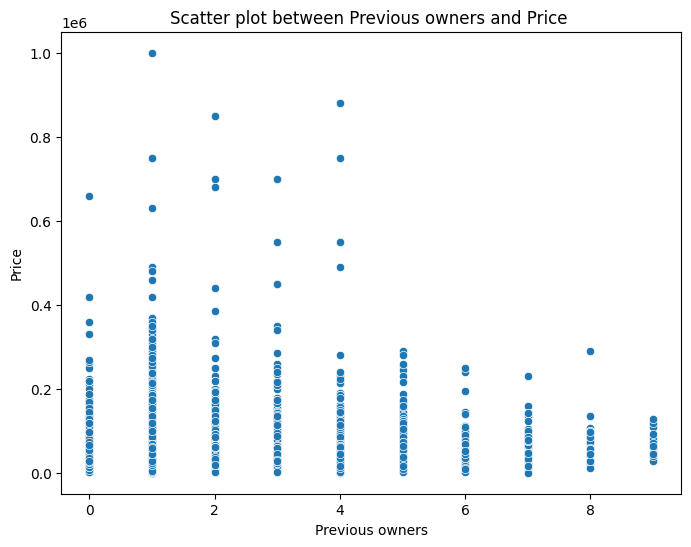

In [33]:
df_subset = df[['Price', 'Previous owners']]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous owners', y='Price', data=df_subset)
plt.title("Scatter plot between Previous owners and Price ")
plt.show()

### normalize Motor power and remove outliers : 

In [34]:
# Identify outliers using the IQR method
Q1_motor = df['Motor power'].quantile(0.25)
Q3_motor = df['Motor power'].quantile(0.75)
IQR_motor = Q3_motor - Q1_motor

outliers_motor = (df['Motor power'] < (Q1_motor - 1.5 * IQR_motor)) | (df['Motor power'] > (Q3_motor + 1.5 * IQR_motor))

# Replace outliers with the median
median_value = df['Motor power'].median()
df.loc[outliers_motor, 'Motor power'] = median_value

In [35]:
df['Motor power'].describe()

count    5690.000000
mean     1681.327944
std       353.831557
min       500.000000
25%      1400.000000
50%      1600.000000
75%      2000.000000
max      2900.000000
Name: Motor power, dtype: float64

In [36]:
motor_scaler = MinMaxScaler()
df['scaled_motor_power'] = motor_scaler.fit_transform(df[['Motor power']])

In [37]:
with open('motor_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(motor_scaler, scaler_file)

In [38]:
df['scaled_motor_power'].describe()

count    5690.000000
mean        0.492220
std         0.147430
min         0.000000
25%         0.375000
50%         0.458333
75%         0.625000
max         1.000000
Name: scaled_motor_power, dtype: float64

### edit عدد الركاب and fill the NULL : 

In [39]:
df['Number Of Passengers'].unique()

array([nan, '4+1', '4+١', '2', '8+1', '1+2', '6+1', '5+1', '7+1', '3+1',
       '2+1', '٤+١', '1+1', 'اكثر من 10', '٧+١', '٧', '6x1', '1', '9+1',
       '1+7', '6+١', '7.1', '١+٤', '8', '٦+١', '7,+ 1', '6±١', '7 =1',
       'مثال: 4 + 1', '٨+١', '٧+1', '1٠4', '22', '4\\١', '1+٤', '4+2',
       '5+2', '2/1'], dtype=object)

In [40]:
# 1+3 i want to convert it into 4 

def arabic_to_english(arabic_number):
    arabic_to_english_dict = {'٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4',
                              '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'}
    return ''.join(arabic_to_english_dict.get(digit, digit) for digit in arabic_number)

def convert_and_sum(row):
    if pd.notna(row) and '+' in row:
        try:
            return sum(int(arabic_to_english(digit)) for digit in re.split('\+|\\s+', row))
        except ValueError:
            return np.nan
    elif pd.notna(row):
        try:
            return int(arabic_to_english(str(row)))
        except ValueError:
            return np.nan
    else:
        return np.nan


df['Number Of Passengers'] = df['Number Of Passengers'].apply(convert_and_sum)


In [41]:
df['Number Of Passengers'].unique()

array([ nan,   5.,   2.,   9.,   3.,   7.,   6.,   8.,   4.,   1.,  10.,
       104.,  22.])

In [42]:
columns_to_train_passengers = ['Model', 'Price', 'Motor power', 'third party', 'vehicle body', 'Number Of Passengers']
df_passengers = df[columns_to_train_passengers]

# Drop rows with missing values in any of the selected columns
df_passengers = df_passengers.dropna(subset=columns_to_train_passengers, how='any')

# Split the data into features (X) and target variable (y)
X_passengers = df_passengers[['Model', 'Price', 'Motor power', 'third party', 'vehicle body']]
y_passengers = df_passengers['Number Of Passengers']

# Split the data into training and testing sets
X_train_passengers, X_test_passengers, y_train_passengers, y_test_passengers = train_test_split(X_passengers, y_passengers, test_size=0.1, random_state=42)

passenger_prediction_model =DecisionTreeRegressor(random_state=42)
passenger_prediction_model.fit(X_train_passengers, y_train_passengers)

# Make predictions on the test set
passengers_predicted_values = passenger_prediction_model.predict(X_test_passengers)

In [43]:
# Filter out rows with null values in 'Number Of Passengers' for prediction
df_to_predict_passengers = df[df['Number Of Passengers'].isnull()]
X_to_predict_passengers = df_to_predict_passengers[['Model', 'Price', 'Motor power', 'third party', 'vehicle body']]

# Create a SimpleImputer and fit it on the training data
passenger_imputer = SimpleImputer()
passenger_imputer.fit(X_passengers)

# Impute missing values in the prediction data using the same imputer
X_to_predict_passenger_imputed = passenger_imputer.transform(X_to_predict_passengers)

# Make predictions on the samples with null 'Number Of Passengers' using passenger_prediction_model
predicted_values_passenger = passenger_prediction_model.predict(X_to_predict_passenger_imputed)

# Fill the null values in the original dataframe with the predicted values using passenger_prediction_model
df.loc[df['Number Of Passengers'].isnull(), 'Number Of Passengers'] = predicted_values_passenger

c:\Users\Rahhal AbuZahra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [44]:
with open('passenger_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(passenger_prediction_model,model_file)

In [45]:
with open('passenger_imputer.pkl', 'wb') as imputer_file:
    pickle.dump(passenger_imputer, imputer_file)

In [46]:
df['Number Of Passengers'] = df['Number Of Passengers'].round().astype(int)

In [47]:
df.isna().sum()

Fuel type               0
license type            0
driving license         0
Gear type               0
Glass                   0
Motor power             0
Payment method          0
Previous owners         0
Number Of Passengers    0
magnesium_rims          0
sunroof                 0
vehicle body            7
third party             7
Sum                     7
Name                    0
Model                   0
Price                   0
scaled_motor_power      0
dtype: int64

In [48]:
df['Number Of Passengers'].describe()

count    5690.000000
mean        5.271002
std         1.641874
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max       104.000000
Name: Number Of Passengers, dtype: float64

In [49]:
df['Number Of Passengers'].unique()

array([  5,   7,   2,   9,   3,   6,   8,   4,   1,  10,  22, 104])

In [50]:
df['Number Of Passengers'].replace(104,5, inplace=True)
df['Number Of Passengers'].replace(22,5, inplace=True)

In [51]:
df['Number Of Passengers'].describe()

count    5690.000000
mean        5.247627
std         0.939934
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Number Of Passengers, dtype: float64

In [52]:
# we can't use insurance to predict the price
df=df.drop('vehicle body',axis=1)
df=df.drop('third party',axis=1)
df=df.drop('Sum',axis=1)

In [53]:
df['Price'].describe()

count      5690.000000
mean      70111.415114
std       57362.278794
min        1111.000000
25%       39000.000000
50%       58000.000000
75%       85000.000000
max      999999.000000
Name: Price, dtype: float64

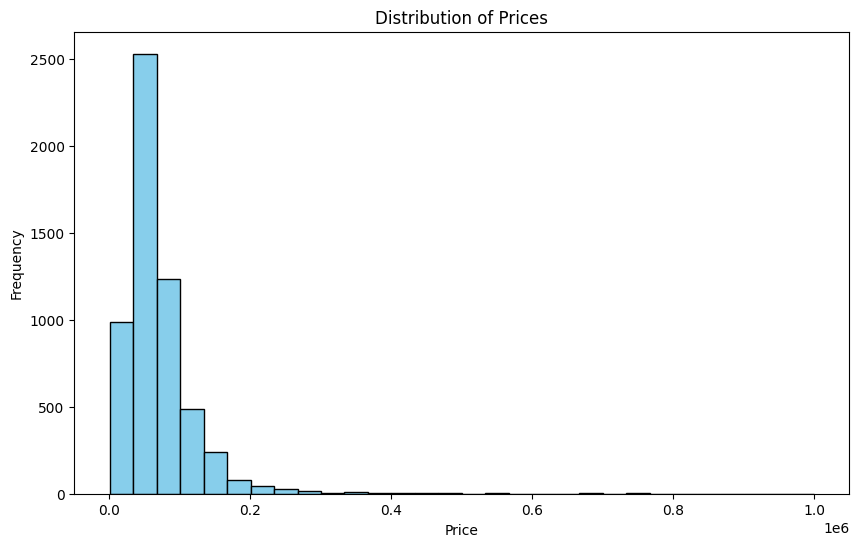

In [54]:
# Histogram of 'Price' before remove the outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [55]:
column_name = 'Price'

# Calculate the interquartile range (IQR)
Q1_price = df[column_name].quantile(0.25)
Q3_price= df[column_name].quantile(0.75)
iqr_price_value = Q3_price - Q1_price

# Set a multiplier for the IQR to define the outlier threshold
threshold_multiplier = 1.5

# Calculate the lower and upper bounds for outliers
price_lower_bound = Q1_price - threshold_multiplier * iqr_price_value
price_upper_bound = Q3_price + threshold_multiplier * iqr_price_value

# Identify outliers using the calculated bounds
price_outliers = (df[column_name] < price_lower_bound) | (df[column_name] > price_upper_bound)

# Calculate the percentage of outliers
price_percentage_outliers = np.sum(price_outliers) / len(df[column_name]) * 100

print(f"Percentage of Outliers: {price_percentage_outliers:.2f}%")

Percentage of Outliers: 5.20%


In [56]:
# Identify and remove outliers from the DataFrame
df = df[(df[column_name] >= price_lower_bound) & (df[column_name] <= price_upper_bound)]

# the percentage of outliers removed
price_percentage_outliers_removed = 100 - (len(df) / len(df[column_name]) * 100)
print(f"Percentage of Outliers Removed: {price_percentage_outliers_removed:.2f}%")

Percentage of Outliers Removed: 0.00%


In [57]:
df['Price'].describe()

count      5394.000000
mean      60976.262885
std       31277.847900
min        1111.000000
25%       38000.000000
50%       55000.000000
75%       78000.000000
max      153000.000000
Name: Price, dtype: float64

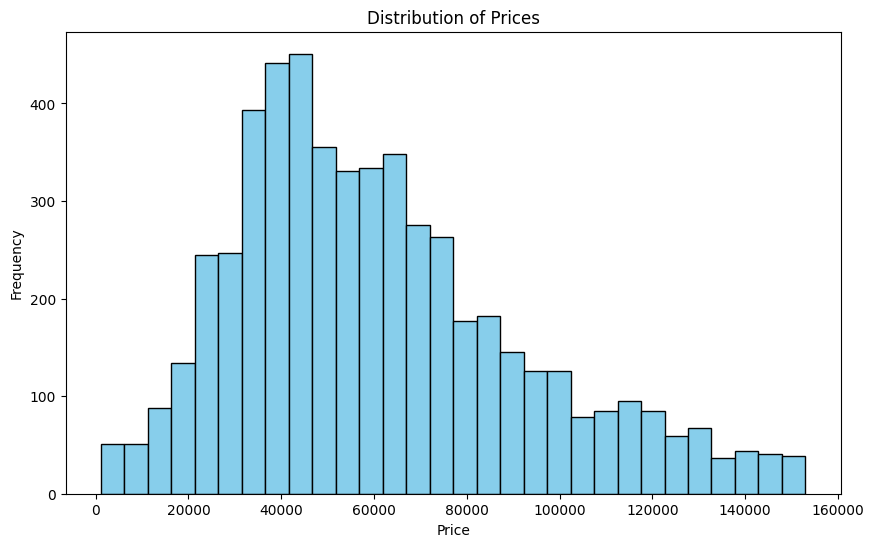

In [58]:
# Histogram of 'Price' after remove the outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [59]:
price_scaler = MinMaxScaler()
df['normalized_price'] = price_scaler.fit_transform(df[['Price']])

In [60]:
with open('price_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(price_scaler, scaler_file)

In [61]:
df['normalized_price'].describe()

count    5394.000000
mean        0.394138
std         0.205926
min         0.000000
25%         0.242868
50%         0.354792
75%         0.506218
max         1.000000
Name: normalized_price, dtype: float64

# Feature Engeneering

In [62]:
df['Fuel type'] = df['Fuel type'].replace({
    'بنزين': 'Gasoline',
    'ديزل': 'Diesel',
    'هايبرد': 'Hybrid',
    'كهرباء': 'Electric'
})

df['Gear type'] = df['Gear type'].replace({
    'اوتوماتيك': 'Automatic',
    'نصف اوتوماتيك': 'Semi-Automatic',
    'عادي': 'ManualGear'
})

df['Glass'] = df['Glass'].replace({
    'الكتروني': 'Electronic',
    'يدوي': 'ManualGlass'
})

df['Payment method'] = df['Payment method'].replace({
    'إمكانية التقسيط': 'Installment',
    'نقدا فقط': 'Cash'
})


In [63]:
one_hot_encoded = pd.get_dummies(df['Fuel type'], prefix=None)
df = pd.concat([df, one_hot_encoded], axis=1)

In [64]:
one_hot_encoded = pd.get_dummies(df['Gear type'], prefix=None)
df = pd.concat([df, one_hot_encoded], axis=1)

In [65]:
one_hot_encoded = pd.get_dummies(df['Glass'], prefix=None)
df = pd.concat([df, one_hot_encoded], axis=1)

In [66]:
one_hot_encoded = pd.get_dummies(df['Name'], prefix=None)
df = pd.concat([df, one_hot_encoded], axis=1)

In [67]:
one_hot_encoded = pd.get_dummies(df['Payment method'], prefix=None)
df = pd.concat([df, one_hot_encoded], axis=1)
df= df.drop('Payment method', axis=1)

In [68]:
df.replace({False: 0, True: 1}, inplace=True)

In [69]:
columns = ['Fuel type', 'Gear type', 'Glass', 'Name']
df= df.drop(columns, axis=1)

In [70]:
license_type_mapping = {
    'تدريب سياقة': 2,
    'تجاري': 6,
    'حكومي': 3,
    'تأجير': 4 , 
    'خصوصي': 5, 
    'عمومي'  : 1
}

df['license type'] = df['license type'].map(license_type_mapping)

In [71]:
license_dict = {'نمرة صفراء': 2, 'فلسطينية': 1}
df['driving license'] = df['driving license'].replace(license_dict)

In [72]:
df['sunroof']=df['sunroof'].astype(int)
df['magnesium_rims']=df['magnesium_rims'].astype(int)

# Train a DecisionTree model to predict the price

In [73]:
y_price = df['normalized_price']
X_price = df.drop(columns=['Price', 'normalized_price'])  

# Split the data into training and testing sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

price_prediction_model = DecisionTreeRegressor(random_state=42)
price_prediction_model.fit(X_train_price, y_train_price)

y_pred =price_prediction_model.predict(X_test_price)


In [74]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test_price, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test_price, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.024061430622746925
R-squared: 0.45172226607600263


In [75]:
with open('price_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(price_prediction_model,model_file)

In [76]:
df

,license type,driving license,Motor power,Previous owners,Number Of Passengers,magnesium_rims,sunroof,Model,Price,scaled_motor_power,...,هونداي سوناتا,هونداي فيرنا,هونداي فيلوستر,هونداي فينيو,هونداي كليك,هونداي كوبيه,هونداي كونا,هونداي ٢٠١٥,Cash,Installment
0,5,1,1600.0,1,5,0,0,2008,44000.0,0.458333,...,0,0,0,0,0,0,0,0,0,1
1,5,1,1400.0,1,5,1,0,2013,58000.0,0.375000,...,0,0,0,0,0,0,0,0,1,0
2,5,1,2000.0,1,5,1,1,2013,40000.0,0.625000,...,0,0,0,0,0,0,0,0,0,1
3,5,1,1900.0,3,5,1,0,2010,70000.0,0.583333,...,0,0,0,0,0,0,0,0,0,1
4,5,1,1600.0,1,5,1,0,1999,33000.0,0.458333,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,1,1,2500.0,1,8,0,0,2010,32000.0,0.833333,...,0,0,0,0,0,0,0,0,0,1
6856,5,1,1000.0,1,5,0,0,2006,29000.0,0.208333,...,0,0,0,0,0,0,0,0,1,0
6858,5,1,1200.0,2,5,1,0,2012,61500.0,0.291667,...,0,0,0,0,0,0,0,0,0,1
6860,5,1,2000.0,1,7,1,1,2001,45000.0,0.625000,...,0,0,0,0,0,0,0,0,1,0


In [77]:
df.to_csv('resultDF.csv', index=False)